In [2]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
# from bokeh.io import output_notebook
# from bokeh.plotting import figure, show, output_file
# output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [3]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [4]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# matplotlib.rc("font", family="Times")

## Colors

In [4]:
N1 = '#65CBFF'
N2 = '#9595C9'

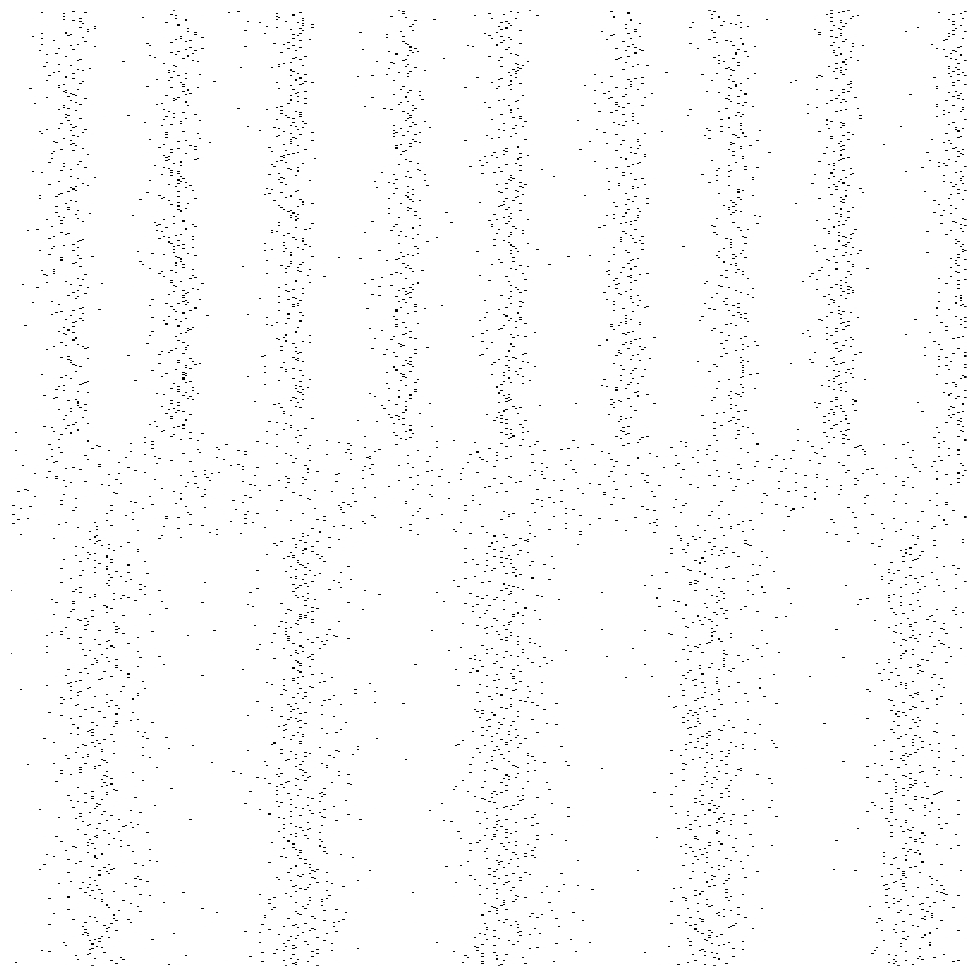

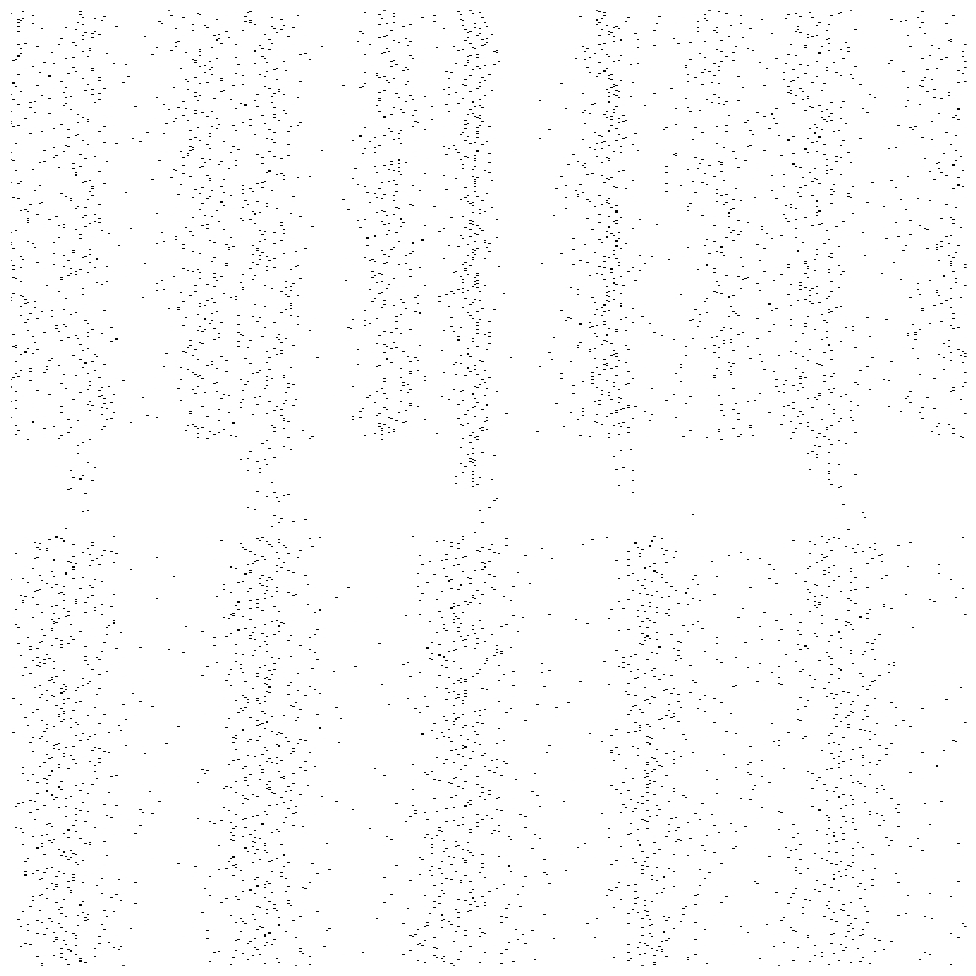

In [292]:
plt.figure(figsize=(10,10))
plt.imshow(r[0:2000, 9000:9400], aspect=0.2, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(PAPER + "rasterstart-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.png" % (tauv, sG, N, T, nu, ratio))

plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(r[0:2000, 19000:19400], aspect=0.2, interpolation='none')
plt.tight_layout()
plt.savefig(PAPER + "rasterend-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f.png" % (tauv, sG, N, T, nu, ratio))

In [293]:
df = pd.DataFrame(columns=('nu','tauv','ratio','g','N','gamma', 'gSteady') )

i=0
N=1000
T = 5000
rList = [0.2,0.5,1,2,3]
nuList = range(0,200,10)
for nu in nuList:
    for tauv in [15, 30, 45, 60, 90]:
            for ratio in rList:
                for g in [10]:
                    i+=1
                    filename = "../data/GetGammaSteadyState/GetSteadyState9-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%.2f" % (tauv, g, N, T, nu, ratio)
                    a = np.load(filename)
                    df.loc[i] = [nu, tauv, ratio, g, N, a['gamma'][-1], np.mean(a['gamma'][-100:])]

In [294]:
df.to_csv('gSteady.csv')

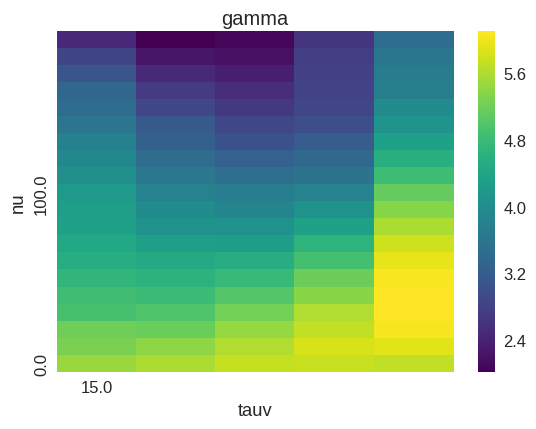

In [303]:
plotHeatmap(df[df['ratio']==0.2], col='gamma', x='tauv',y='nu', cmap='viridis')
plt.savefig(PAPER  +'gamma-steady-heatmap.pdf')
# plotHeatmap(df[df['tauv']==15], col='gamma', x='ratio',y='nu')

keys : ['g1N1', 'vvmN2', 'i1N1', 'g1s', 'g1', 'g1N2', 'vvm', 'vvmN1', 'i1N2']

In [9]:
df = pd.DataFrame(columns=('nu','tauv','ratio','sG','N',
                           'csdF_s', 'csdP_s', 'csdF_e', 'csdP_e', 'a0', 'm0',
                           'f1_s', 'p1_s', 'f2_s', 'p2_s',
                          'f1_e', 'p1_e', 'f2_e', 'p2_e') )
ratio = 0.2
tauv, sG, N, T, nu = 30, 100, 2000, 20000, 100

nulist = [0,50,100,150]
tauvlist = [15, 30, 45, 60, 90]
sGlist = [0,10,50,100]
i=-1
for tauv in tauvlist:
    for sG in sGlist:
        for nu in nulist:
            i+=1
            rasterPath = "../data/rasters/rasterPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f" % (tauv,                                                                            sG, N, T, nu, ratio)
            r = np.load(rasterPath)
            varPath = "../data/rasters/rastervarPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f" % (tauv,                                                                                     sG, N, T, nu, ratio)
            var = np.load(varPath)
            
            s = 6900
            e = 16900
            e0 = 11000
            d = 3000
            i1 = var['vvmN1']
            i2 = var['vvmN2']
            f, Pxy = signal.csd(i1[s:s+d], i2[s:s+d], fs=1 / 0.00025, nperseg=512)
            f0, Pxy0 = signal.csd(i1[e0:e0+d], i2[e0:e0+d], fs=1 / 0.00025, nperseg=512)
            f2, Pxy2 = signal.csd(i1[e:e+d], i2[e:e+d], fs=1 / 0.00025, nperseg=512)
            
            maxBegin = np.max(np.abs(Pxy))
            argmaxBegin = np.argmax(np.abs(Pxy))
            maxEnd = np.max(np.abs(Pxy2))
            argmaxEnd = np.argmax(np.abs(Pxy2))
            m0 = np.max(np.abs(Pxy0))
            a0 = np.argmax(np.abs(Pxy0))
        
            f1_s,p1_s = fourier(i1[s:s+d])
            f2_s,p2_s = fourier(i2[s:s+d])
            f1_e,p1_e = fourier(i1[e:e+d])
            f2_e,p2_e = fourier(i2[e:e+d])
            df.loc[i] = [nu, tauv, ratio, sG, N, 
                         argmaxBegin, maxBegin, argmaxEnd, maxEnd, 
                         a0, m0,
                         f1_s, p1_s, f2_s, p2_s, 
                         f1_e, p1_e, f2_e, p2_e, 
                         ]

In [10]:
df.to_csv(PAPER + 'csd_data.csv')

In [11]:
df[(df['sG']==100) & (df['nu']==100)]

,nu,tauv,ratio,sG,N,csdF_s,csdP_s,csdF_e,csdP_e,a0,m0,f1_s,p1_s,f2_s,p2_s,f1_e,p1_e,f2_e,p2_e
14,100.0,15.0,0.2,100.0,2000.0,8.0,7.879264,8.0,11.404568,8.0,10.198263,66.577896,12.975122,61.251664,15.901776,66.577896,13.468914,66.577896,12.814824
30,100.0,30.0,0.2,100.0,2000.0,7.0,1.676343,8.0,11.052569,8.0,8.517941,63.914780,15.745471,50.599201,15.241813,58.588549,15.679272,58.588549,15.243462
46,100.0,45.0,0.2,100.0,2000.0,17.0,1.495512,6.0,6.752905,7.0,3.318121,63.914780,15.984714,45.272969,15.753766,103.861518,11.330599,47.936085,14.717482
62,100.0,60.0,0.2,100.0,2000.0,9.0,2.380697,5.0,7.171564,5.0,7.138265,61.251664,16.293748,37.283622,15.882170,39.946738,11.764002,39.946738,15.247744
78,100.0,90.0,0.2,100.0,2000.0,8.0,1.800633,0.0,0.000000,0.0,0.000000,61.251664,14.890229,21.304927,15.692198,0.000000,-inf,0.000000,-inf


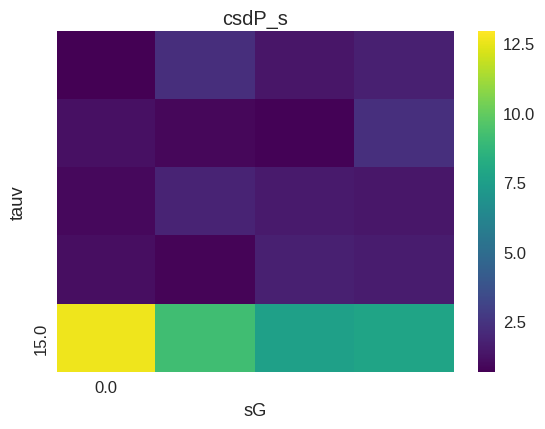

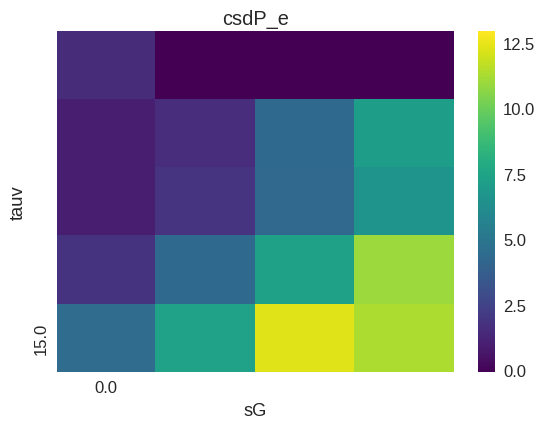

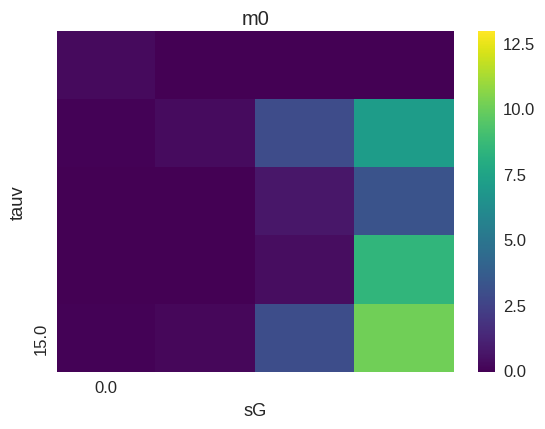

In [17]:
plotHeatmap(df[df['nu']==100], col='csdP_s', x='sG',y='tauv', cmap='viridis', vmax=13)
plt.savefig(PAPER + 'csd_before.pdf')
plotHeatmap(df[(df['nu']==100)], col='csdP_e', x='sG',y='tauv', cmap='viridis', vmax=13)
plt.savefig(PAPER + 'csd_after.pdf')
plotHeatmap(df[(df['nu']==100)], col='m0', x='sG',y='tauv', cmap='viridis', vmax=13)
plt.savefig(PAPER + 'csd_after0.pdf')


In [51]:
# plotHeatmap(df[(df['nu']==100) & (df['tauv']==15)], col='csdP_e', x='sG',y='tauv', cmap='viridis')

In [64]:
g = 10
N = 2000
T = 5000
nu = 100
sG = 100
tauv = 30
gpu = TfConnEvolveNet(N=N,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=True,
                  g0=g,
                  startPlast = 0,
                  nu = nu,
                  NUM_CORES = 1,
                  both=True,
                 sG = sG,
                      )
apple = generateInput2(3, T)*20
gpu.input = apple
gpu.debug = False
gpu.initWGap = False
gpu.connectTime=500
gpu.FACT = 50
gpu.ratio = 1
gpu.runTFSimul()


39.05



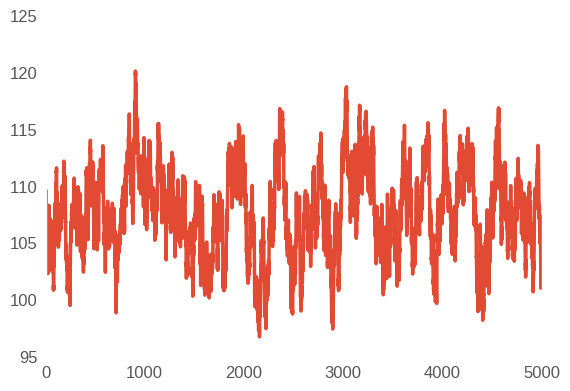

In [65]:
plt.plot(gpu.iEff)

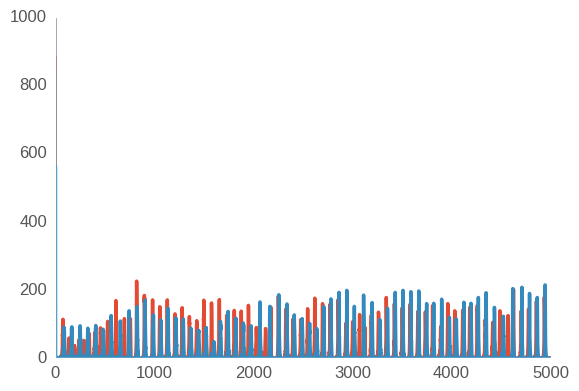

In [66]:
plt.plot(gpu.vvmN1)
plt.plot(gpu.vvmN2)

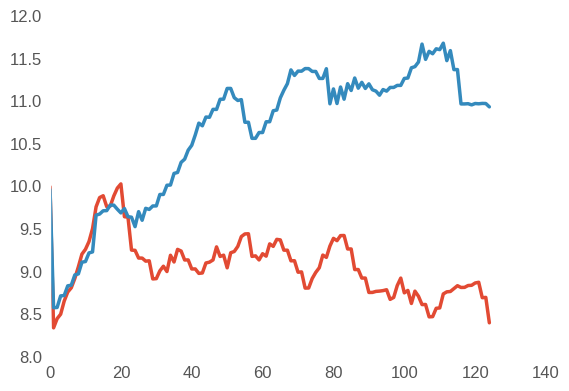

In [67]:
plt.plot(gpu.gammaN1)
plt.plot(gpu.gammaN2)

In [82]:
T=5000
d = 2000
sigma=0.01
apple = generateInput2(3, T)*20
pear = generateInput2(4, T)*20
m1s = float(mutual_info.mutual_information_2d((apple[1000:1000+d]), (gpu.i1[1000:1000+d]), 
                                                                     normalized=False, sigma=sigma) )
m1e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (gpu.i1[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

m2s = float(mutual_info.mutual_information_2d((apple[1000:1000+d]), (gpu.i2[1000:1000+d]), 
                                                                     normalized=False, sigma=sigma) )
m2e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (gpu.i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

print(m1s, m1e)
print(m2s, m2e)

2.8442460555170603 2.861970663914489
2.680447571418598 2.782699753857922


In [79]:
np.random.seed(2)
a = np.random.rand(100)
np.random.seed(5)
b = np.random.rand(100)
sigma = 0.01
normalized=True
print(mutual_info.mutual_information_2d(a, b, sigma =sigma, normalized=normalized))
print(mutual_info.mutual_information_2d(apple, pear, sigma =sigma, normalized=normalized))

0.911904587725
0.222938631675


In [76]:
np.random.seed(2)
a = np.random.rand(100)
np.random.seed(5)
b = np.random.rand(100)
print(np.corrcoef(a,b)[0,1])
print(np.corrcoef(apple, pear)[0,1])

0.0602079582477
0.0773966545894


In [78]:
s=1000
c1s = np.corrcoef(apple[s:s+d], gpu.i1[s:s+d])[0,1]
c1e = np.corrcoef(apple[T-d:T], gpu.i1[T-d:T])[0,1]

c2s = np.corrcoef(apple[s:s+d], gpu.i2[s:s+d])[0,1]
c2e = np.corrcoef(apple[T-d:T], gpu.i2[T-d:T])[0,1]
print(c1s, c1e)
print(c2s, c2e)

s=1000
c1s = np.corrcoef(apple[s:s+d], gpu.vvmN1[s:s+d])[0,1]
c1e = np.corrcoef(apple[T-d:T], gpu.vvmN1[T-d:T])[0,1]

c2s = np.corrcoef(apple[s:s+d], gpu.vvmN2[s:s+d])[0,1]
c2e = np.corrcoef(apple[T-d:T], gpu.vvmN2[T-d:T])[0,1]
print(c1s, c1e)
print(c2s, c2e)

0.407279189367 0.360063049331
0.57160733491 0.466459675266
0.0342970402992 0.0197004126374
0.00579691410785 -0.00151396962304
